Climate Change Data Anlysis on World Bank Data ( Population growth and
 unemplyment rate) 


In [ ]:
import pandas as pd
# Read the Dataset of the Population Growth
df = pd.read_csv("/content/API_SP.POP.GROW_DS2_en_csv_v2_5358698.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.810231,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045
1,Africa Eastern and Southern,AFE,Population growth (annual %),SP.POP.GROW,NaN,2.660180,2.732633,2.753248,2.806915,2.840787,...,2.740405,2.780157,2.774992,2.802587,2.728160,2.655673,2.688373,2.691136,2.678185,2.607473
2,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.925952,2.014879,2.078997,2.139651,2.216007,...,4.077628,3.466788,3.657576,3.121341,2.581549,2.866492,2.885208,2.908529,3.134747,2.851358
3,Africa Western and Central,AFW,Population growth (annual %),SP.POP.GROW,NaN,2.115789,2.145723,2.190827,2.211360,2.242567,...,2.812851,2.761839,2.750731,2.723317,2.713059,2.706266,2.669239,2.633982,2.615646,2.573377
4,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.558355,1.460738,1.410425,1.301745,1.111041,...,3.758703,3.735525,3.684429,3.617678,3.586211,3.550987,3.464457,3.395278,3.268348,3.166030


In [ ]:
import pandas as pd
# Read the Dataset of the Population Growth
df2 = pd.read_csv("/content/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5358416.csv")
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,7.333336,7.318747,7.242706,7.160694,7.063796,7.055998,...,6.599356,6.512784,6.555645,6.707142,6.855589,6.940365,6.913046,7.121664,7.631303,7.920219
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.121000,8.168000,8.123000,8.111000,8.260000,8.165000,...,8.019000,7.949000,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.224595,4.335460,4.372125,4.366898,4.348996,4.379537,...,4.167556,3.804448,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.489000,4.487000,4.531000,4.395000,4.304000,4.274000,...,8.064000,8.834000,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000


In [ ]:
def convert_to_col(df):
    id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
    value_vars = df.columns.difference(id_vars).tolist()
    df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Value')
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    return df['Year']

def convert_2_datafram(df):
  Year = convert_to_col(df)

  return df['Country Name'] , Year


In [ ]:
path = "/content/API_SP.POP.GROW_DS2_en_csv_v2_5358698.csv"
df = pd.read_csv(path)
Country_Name, Year = convert_2_datafram(df)

print(Country_Name)
print(Year)

0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country Name, Length: 266, dtype: object
0       1960-01-01
1       1960-01-01
2       1960-01-01
3       1960-01-01
4       1960-01-01
           ...    
16487   2021-01-01
16488   2021-01-01
16489   2021-01-01
16490   2021-01-01
16491   2021-01-01
Name: Year, Length: 16492, dtype: datetime64[ns]


To begin exploring the Population and Unemployment dataset, first check its available columns and then generate a summary using the .describe method.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/API_SP.POP.GROW_DS2_en_csv_v2_5358698.csv")
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [ ]:
# Calculate summary statistics
print(df.describe())

       1960        1961        1962        1963        1964        1965  \
count   0.0  264.000000  264.000000  264.000000  264.000000  264.000000   
mean    NaN    2.194004    2.286008    2.358841    2.303821    2.290847   
std     NaN    1.380567    1.382939    1.521203    1.375586    1.419673   
min     NaN   -1.015528   -1.510091   -1.845309   -2.110700   -2.354033   
25%     NaN    1.370124    1.418289    1.484893    1.479080    1.412867   
50%     NaN    2.204979    2.304936    2.394379    2.390442    2.381150   
75%     NaN    2.845553    2.848907    2.885317    2.873235    2.847189   
max     NaN   10.638254   11.774148   12.851885   12.147917   11.964503   

             1966        1967        1968        1969  ...        2012  \
count  264.000000  264.000000  264.000000  264.000000  ...  265.000000   
mean     2.253186    2.245973    2.265524    2.235044  ...    1.349639   
std      1.426523    1.457580    1.698895    1.813731  ...    1.434792   
min     -2.596081   -2.82954

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/unemployement.csv")
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [ ]:
# Calculate summary statistics
print(df2.describe())

             1991        1992        1993        1994        1995        1996  \
count  235.000000  235.000000  235.000000  235.000000  235.000000  235.000000   
mean     7.200893    7.538033    7.957919    8.132981    8.204283    8.361057   
std      5.559648    5.853788    5.895106    5.817520    5.894885    5.930076   
min      0.600000    0.661000    0.637000    0.645000    0.647000    0.640000   
25%      3.005000    3.251000    3.719000    3.992487    4.018328    4.098335   
50%      5.815639    5.919194    6.123000    6.550999    7.063796    7.141000   
75%      9.764504   10.176000   10.842606   11.095000   10.980617   11.329000   
max     29.886999   30.014999   29.745001   30.000000   35.599998   38.799999   

             1997        1998        1999        2000  ...        2012  \
count  235.000000  235.000000  235.000000  235.000000  ...  235.000000   
mean     8.259042    8.308067    8.441300    8.319262  ...    7.991842   
std      5.741922    5.692938    5.672374    5.7

To compare indicators across different countries over time and explore their interdependence, create a bar chart, line chart, and correlation matrix. To gain deeper insights not only among countries but also among indicators, use a Choropleth Map.

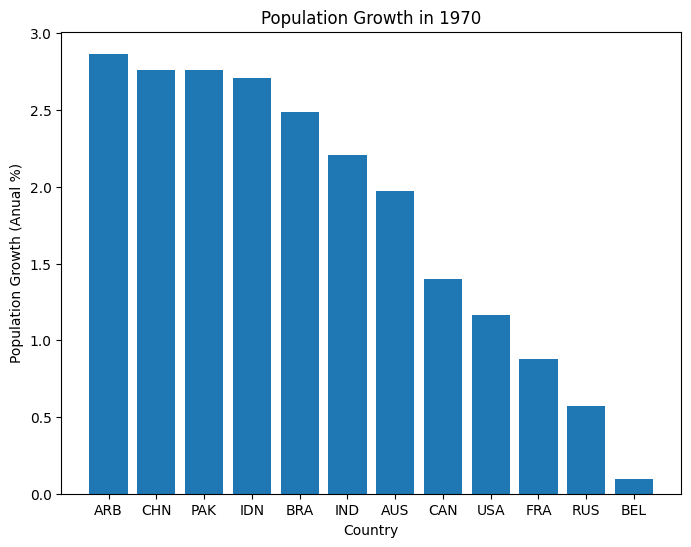

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/API_SP.POP.GROW_DS2_en_csv_v2_5358698.csv')

# create a list of countries to select
countries_to_select = ['USA', 'RUS', 'IND', 'PAK', 'AUS', 'BEL','CHN', 'IDN','CAN', 'FRA','ARB','BRA' ]

# filter the dataset by the selected countries
selected_df = df[df['Country Code'].isin(countries_to_select)]

# Select the columns of interest
selected_df = selected_df[['Country Code', '1970']]

# Sort the data in descending order
selected_df = selected_df.sort_values(by='1970', ascending=False)

# Create the bar chart
plt.figure(figsize=(8,6))
plt.bar(selected_df['Country Code'], selected_df['1970'])
plt.xlabel('Country')
plt.ylabel('Population Growth (Anual %)')
plt.title('Population Growth in 1970')
plt.show()

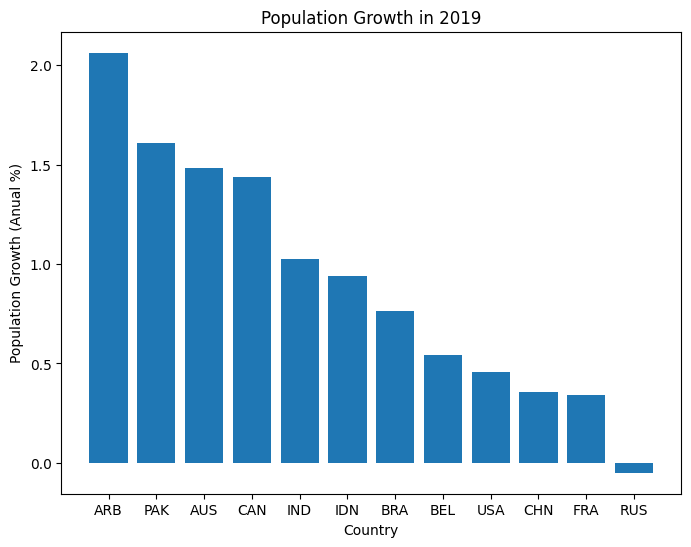

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/API_SP.POP.GROW_DS2_en_csv_v2_5358698.csv')

# create a list of countries to select
countries_to_select = ['USA', 'RUS', 'IND', 'PAK', 'AUS', 'BEL','CHN', 'IDN','CAN', 'FRA','ARB','BRA' ]

# filter the dataset by the selected countries
selected_df = df[df['Country Code'].isin(countries_to_select)]

# Select the columns of interest
selected_df = selected_df[['Country Code', '2019']]

# Sort the data in descending order
selected_df = selected_df.sort_values(by='2019', ascending=False)

# Create the bar chart
plt.figure(figsize=(8,6))
plt.bar(selected_df['Country Code'], selected_df['2019'])
plt.xlabel('Country')
plt.ylabel('Population Growth (Anual %)')
plt.title('Population Growth in 2019')
plt.show()

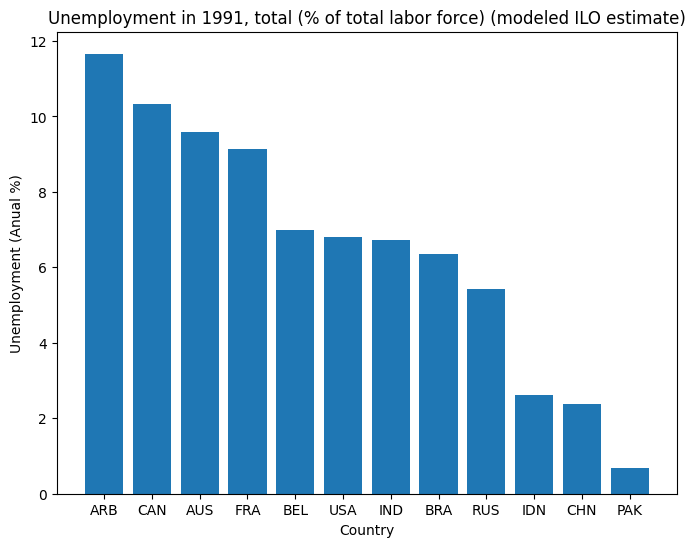

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('unemployement.csv')

# create a list of countries to select
countries_to_select = ['USA', 'RUS', 'IND', 'PAK', 'AUS', 'BEL','CHN', 'IDN','CAN', 'FRA','ARB','BRA' ]

# filter the dataset by the selected countries
selected_df = df[df['Country Code'].isin(countries_to_select)]

# Select the columns of interest
selected_df = selected_df[['Country Code', '1991']]

# Sort the data in descending order
selected_df = selected_df.sort_values(by='1991', ascending=False)

# Create the bar chart
plt.figure(figsize=(8,6))
plt.bar(selected_df['Country Code'], selected_df['1991'])
plt.xlabel('Country')
plt.ylabel('Unemployment (Anual %)')
plt.title('Unemployment in 1991, total (% of total labor force) (modeled ILO estimate)')
plt.show()

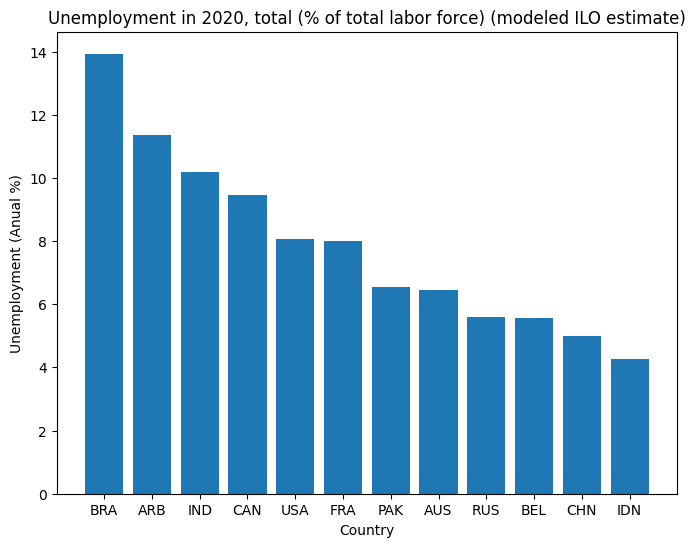

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('unemployement.csv')

# create a list of countries to select
countries_to_select = ['USA', 'RUS', 'IND', 'PAK', 'AUS', 'BEL','CHN', 'IDN','CAN', 'FRA','ARB','BRA' ]

# filter the dataset by the selected countries
selected_df = df[df['Country Code'].isin(countries_to_select)]

# Select the columns of interest
selected_df = selected_df[['Country Code', '2020']]

# Sort the data in descending order
selected_df = selected_df.sort_values(by='2020', ascending=False)

# Create the bar chart
plt.figure(figsize=(8,6))
plt.bar(selected_df['Country Code'], selected_df['2020'])
plt.xlabel('Country')
plt.ylabel('Unemployment (Anual %)')
plt.title('Unemployment in 2020, total (% of total labor force) (modeled ILO estimate)')
plt.show()

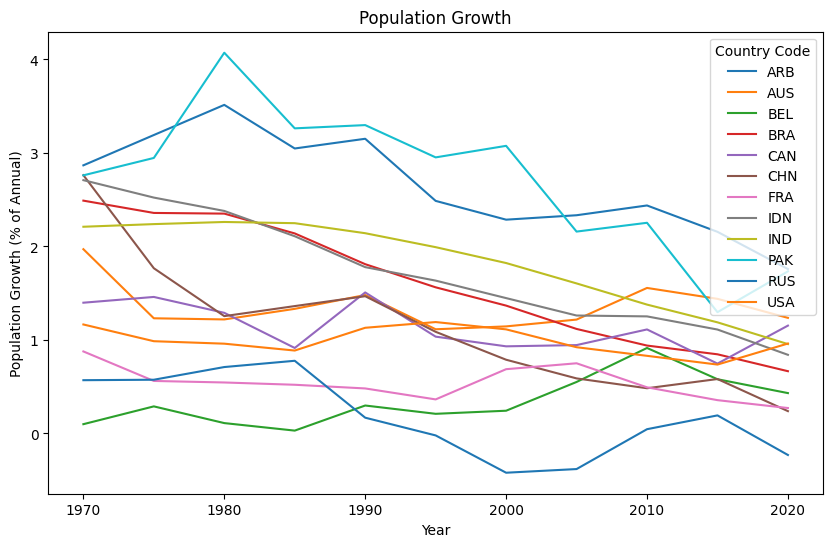

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/API_SP.POP.GROW_DS2_en_csv_v2_5358698.csv')

# Select countries of interest
countries = ['USA', 'RUS', 'IND', 'PAK', 'AUS', 'BEL','CHN', 'IDN','CAN', 'FRA','ARB','BRA' ]

# Subset the data for these countries
subset = df[df["Country Code"].isin(countries)]

# Set the index to be the country names
subset.set_index("Country Code", inplace=True)

# Select columns of interest
cols = ['1970', '1975', '1980', '1985', '1990', '1995', '2000','2005', '2010', '2015', '2020']
subset = subset[cols]

# Plot the data
subset.T.plot(kind='line', figsize=(10,6))
plt.title('Population Growth')
plt.xlabel('Year')
plt.ylabel('Population Growth (% of Annual)')
plt.show()


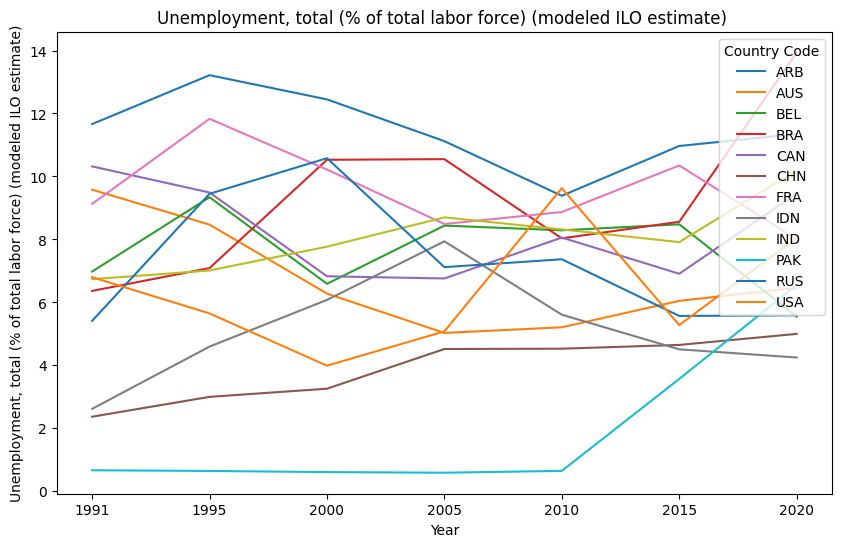

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5358416.csv')
# Select countries of interest
countries = ['USA', 'RUS', 'IND', 'PAK', 'AUS', 'BEL','CHN', 'IDN','CAN', 'FRA','ARB','BRA' ]

# Subset the data for these countries
subset1 = df2[df2["Country Code"].isin(countries)]

# Set the index to be the country names
subset1.set_index("Country Code", inplace=True)

# Select columns of interest
cols = [ '1991', '1995', '2000','2005', '2010', '2015', '2020']
subset1 = subset1[cols]

# Plot the data
subset1.T.plot(kind='line', figsize=(10,6))
plt.title('Unemployment, total (% of total labor force) (modeled ILO estimate) ')
plt.xlabel('Year')
plt.ylabel('Unemployment, total (% of total labor force) (modeled ILO estimate)')
plt.show()


**Explore and understand any correlations (or lack of) between indicators. Does this vary between country, have any correlations or trends changed with time?**

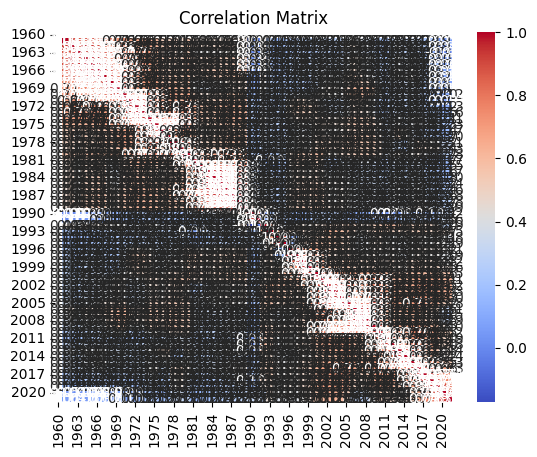

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('/content/API_SP.POP.GROW_DS2_en_csv_v2_5358698.csv')

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix using heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Load population data from World Bank dataset
df = pd.read_csv('/content/API_SP.POP.GROW_DS2_en_csv_v2_5358698.csv')

# Create Choropleth Map
fig = px.choropleth(df, locations='Country Code', color='1980',
                    hover_name='Country Name',
                    projection='mercator',
                    title='World Population Growth in 1980')
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Load population data from World Bank dataset
df = pd.read_csv('/content/API_SP.POP.GROW_DS2_en_csv_v2_5358698.csv')

# Create Choropleth Map
fig = px.choropleth(df, locations='Country Code', color='2020',
                    hover_name='Country Name',
                    projection='mercator',
                    title='World Population Growth in 2020')
fig.show()